# 2024 Summer Super-Kamiokande Project

Building a deep learning model to classify images of electrons and muons causing rings at the Super Kamiokande neutrino detector. This data is based on https://www-sk.icrr.u-tokyo.ac.jp/sk/about/detector/ 's simulation data, and uses Tensorflow to classify the images.

In [2]:
#Importing required python modules
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from matplotlib.colors import Normalize
from matplotlib import cm
import glob

### Generating Images from Collisions - Electrons causing cherenkov ring

Firstly, data from the simulation is extracted. When a neutrino collides with a nucleon of the pure water in the SK detector, it forms cherenkov radiation in a ring-like manner. This cherenkov radiation is detected in the photomultiplier tube, PMT, located around the detector. 

The following code makes a plot of the ring based on the data. When the neutrino collides with a nucleon, it produces muons and electrons, whereas a direct collision with the electron merely produces the cherenkov beam. 

Processing Electrondata\1ring-e.0000.000002.csv
[202.9943 842.2059 -30.9523]


C:\Users\saraw\AppData\Local\Temp\ipykernel_20000\2305928361.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


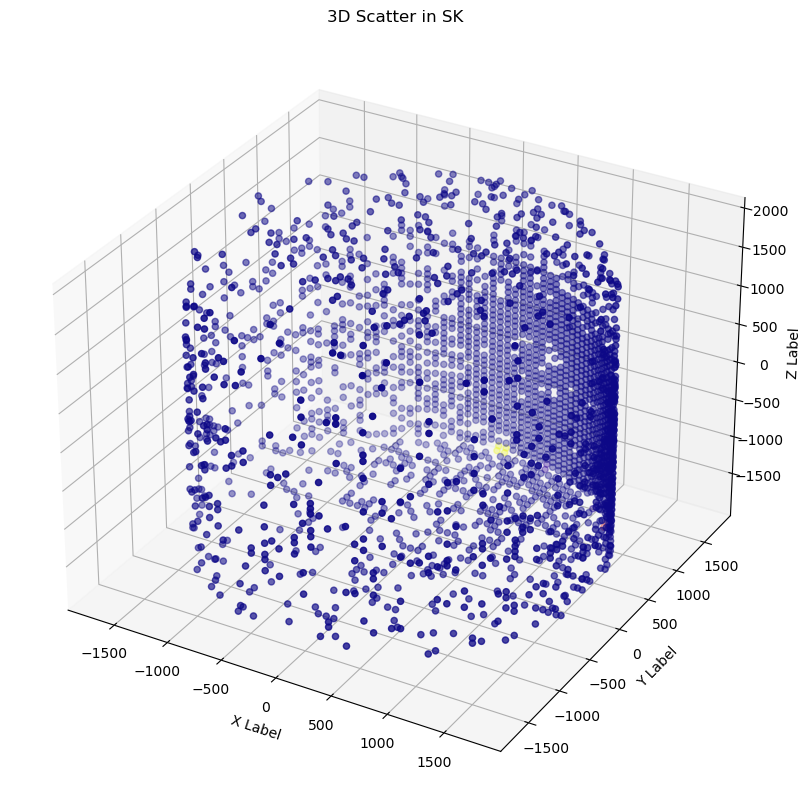

Processing Electrondata\1ring-e.0001.000018.csv
[ -20.4134  148.145  -109.7067]


C:\Users\saraw\AppData\Local\Temp\ipykernel_20000\2305928361.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


KeyboardInterrupt: 

In [3]:
input_files = glob.glob('Electrondata/1ring-e*.csv')

# Initialize lists and counters
pmt_id = []
q = []
t = []
x = []
y = []
z = []

vertex = []
momentum = []
mass_list = []
pid_list = []
momentum_list = []
parent_list = []
status_list = []

nhits = 0
npart = 0

for input_file_name in input_files:
    with open(input_file_name, "r") as input_file:
        print("Processing", input_file_name)
        reader = csv.reader(input_file)

        for row in reader:
            if row[0] == '#E' and 'Run #' not in row[1]:
                run_no = row[1]
                event_no = row[2]
                trig_id = row[3]
                year = row[4]
                month = row[5]
                day = row[6]
                hour = row[7]
                minute = row[8]
                second = row[9]

            if row[0] == '#V' and 'x' not in row[1]:
                vertex.append(float(row[1].strip()))
                vertex.append(float(row[2].strip()))
                vertex.append(float(row[3].strip()))

            if row[0] == '#P' and 'ID' not in row[1]:
                index_part = row[1]
                pid_list.append(row[2])
                mass_list.append(float(row[3].strip()))
                momentum.append(float(row[4].strip()))
                momentum.append(float(row[5].strip()))
                momentum.append(float(row[6].strip()))
                momentum_list.append(momentum.copy())
                momentum.clear()
                parent_list.append(row[7])
                status_list.append(row[8])
                npart += 1

            if '#' not in row[0] and len(row) > 1:
                pmt_id.append(int(row[0]))
                q.append(float(row[1]))
                t.append(float(row[2]))
                x.append(float(row[3]))
                y.append(float(row[4]))
                z.append(float(row[5]))

        # Convert vertex and momentum lists to numpy arrays
        vertex_float = np.array(vertex)
        
        x_data = np.array(x)
        y_data = np.array(y)
        z_data = np.array(z)
        
        data = np.vstack([x_data, y_data, z_data]).T
        dist = data - vertex_float
        
        momentum_e = None
        for index, mass in enumerate(mass_list):
            if mass == 0.5110:  # Electron mass in MeV/c^2
                momentum_e = np.array(momentum_list[index])
                break
        print(momentum_e)

        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection='3d')
        
        # Check and plot data
        if data.shape[0] > 0:
            kde = KernelDensity(bandwidth=10).fit(data)
            density = kde.score_samples(data)
    
            # Normalise density for color mapping
            norm = Normalize(vmin=density.min(), vmax=density.max())
            normalized_density = norm(density)

            cmap = cm.get_cmap('plasma')
            colors = cmap(normalized_density)

            ax.scatter(x_data, y_data, z_data, c=colors)
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            ax.set_title('3D Scatter in SK')

            # Confirm the 'Electron' folder exists
            os.makedirs("Electron", exist_ok=True)

            # Save figure
            base_name = os.path.splitext(os.path.basename(input_file_name))[0]
            save_path = os.path.join("Electron", "3dpic_" + base_name + ".png")
            plt.savefig(save_path)
            plt.show()

        # Reset lists and counters for the next file
        pmt_id = []
        q = []
        t = []
        x = []
        y = []
        z = []

        vertex = []
        momentum = []
        mass_list = []
        pid_list = []
        momentum_list = []
        parent_list = []
        status_list = []

        nhits = 0
        npart = 0

### Muon causing cherenkov ring

In [ ]:
input_files = glob.glob('Muondata/1ring-mu*.csv')

pmt_id = []
q = []
t = []
x = []
y = []
z = []

vertex = []
momentum = []
mass_list = []
pid_list = []
momentum_list = []
parent_list = []
status_list = []

nhits = 0
npart = 0

for input_file_name in input_files:
    with open(input_file_name, "r") as input_file:
        print("Processing", input_file_name)
        reader = csv.reader(input_file)

        for row in reader:
            if row[0] == '#E' and 'Run #' not in row[1]:
                run_no = row[1]
                event_no = row[2]
                trig_id = row[3]
                year = row[4]
                month = row[5]
                day = row[6]
                hour = row[7]
                minute = row[8]
                second = row[9]

            if row[0] == '#V' and 'x' not in row[1]:
                vertex.append(float(row[1].strip()))
                vertex.append(float(row[2].strip()))
                vertex.append(float(row[3].strip()))

            if row[0] == '#P' and 'ID' not in row[1]:
                index_part = row[1]
                pid_list.append(row[2])
                mass_list.append(float(row[3].strip()))
                momentum.append(float(row[4].strip()))
                momentum.append(float(row[5].strip()))
                momentum.append(float(row[6].strip()))
                momentum_list.append(momentum.copy())
                momentum.clear()
                parent_list.append(row[7])
                status_list.append(row[8])
                npart += 1

            if '#' not in row[0] and len(row) > 1:
                pmt_id.append(int(row[0]))
                q.append(float(row[1]))
                t.append(float(row[2]))
                x.append(float(row[3]))
                y.append(float(row[4]))
                z.append(float(row[5]))

        vertex_float = np.array(vertex)
        
        x_data = np.array(x)
        y_data = np.array(y)
        z_data = np.array(z)
        
        data = np.vstack([x_data, y_data, z_data]).T
        dist = data - vertex_float
        
        momentum_mu = None
        for index, mass in enumerate(mass_list):
            if mass == 0.5110:  # Electron mass in MeV/c^2 (likely should be adjusted for muons)
                momentum_mu = np.array(momentum_list[index])
                break
        print(momentum_mu)

       
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection='3d')
        
        if data.shape[0] > 0:
            kde = KernelDensity(bandwidth=10).fit(data)
            density = kde.score_samples(data)
    
            norm = Normalize(vmin=density.min(), vmax=density.max())
            normalized_density = norm(density)

            cmap = cm.get_cmap('plasma')
            colors = cmap(normalized_density)

            ax.scatter(x_data, y_data, z_data, c=colors)
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            ax.set_title('3D Scatter in SK')

            # Confirm the 'Muon' folder exists
            os.makedirs("Muon", exist_ok=True)

            # Save figure
            base_name = os.path.splitext(os.path.basename(input_file_name))[0]
            save_path = os.path.join("Muon", "3dpic_" + base_name + ".png")
            plt.savefig(save_path)
            plt.show()

        # Reset lists and counters for the next file
        pmt_id = []
        q = []
        t = []
        x = []
        y = []
        z = []

        vertex = []
        momentum = []
        mass_list = []
        pid_list = []
        momentum_list = []
        parent_list = []
        status_list = []

        nhits = 0
        npart = 0

### Using Deeplearning to Classify Images

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


### Understanding what Convolutional Neural Networks are and how to use it

CNN specialises on pattern recognition. An artifical neural network is composed of layers, each interconnected and receives input, modulates, then provides output into the next layer. A CNN is a portion of the layers.

The filters within CNN performs the pattern recognition. 

An image is composed of pixels, and zooming in on one aspect and applying 'filters'. A filter looks for a pattern within a set area, and compares that to the data until it has compared all of the image. Each time, it produces a numerical value to evaluate how accurate the filter is, and builds an array (pooling) of all the portions of the image.

In the second layer, there can be more abstract filters which gradually zoom out of the image. Each iteration increasingly performs more tasks.

#### Setting up the model
We begin by preprocessing the data into the training data and the validation data. This essentially separates the 200 images generated earlier into images for training the model, then for the testing. In this process, the pixel values are normalised into decimal values from 0 to 1.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

base_dir = './'  

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    validation_split=0.15  # n% of the data for validation
)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,  # This should be the base directory containing the 'Electron' and 'Muon' folders
    target_size=(256, 256),  # Resize images to match the input shape expected by the model
    batch_size=32,  # Number of images to yield from the generator per batch
    class_mode='binary',  # Since it's a binary classification problem
    subset='training',  # Use this generator for training
    classes=['Electron', 'Muon']  # Specify the folder names
)

# Create validation generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,  # Same base directory
    target_size=(256, 256),  # Same target size
    batch_size=32,  # Same batch size
    class_mode='binary',  # Binary classification
    subset='validation',  # Use this generator for validation
    classes=['Electron', 'Muon']  # Specify the folder names
)

Found 172 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


#### Building a model 

Layers refer to the building blocks that make up the network. Each layer performs a specific function, transforming the data in a particular way before passing it on to the next layer. Think of it like an assembly line where each step processes the input data in some way, refining it closer to the desired output.

Here's a breakdown of some common types of layers:
Video: https://www.youtube.com/watch?v=YhatZb5SzE0

Input Layer: This is the first layer in the network, where the data enters. It doesn't do much processing; it just passes the data to the next layer.

Dense (Fully Connected) Layer: This layer connects every neuron (a small unit that processes information) in one layer to every neuron in the next layer. It's like a big web of connections, and it's often used for learning patterns in the data.

Convolutional Layer: Commonly used in image processing, this layer scans the input with a small window, called a filter or kernel, to pick out features like edges, textures, or colors.

Activation Layer: This layer applies a function to each neuron to decide if it should activate (i.e., pass information forward). It's like a decision-making step that helps the network learn complex patterns.

Dropout Layer: To prevent the network from relying too much on any single neuron (which can lead to overfitting), this layer randomly "turns off" some neurons during training.

Output Layer: This is the final layer that produces the network's output, like a prediction or classification.

In a Sequential model, these layers are stacked one after another in a straight line. Each layer takes the output from the previous layer, processes it, and sends the result to the next layer. The limitation of the Sequential API is that you can't easily create networks with complex structures, like layers that share information, have multiple inputs, or produce multiple outputs.

Compared to this, the functional API can do complex models, and define models that require extended flexibility.

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#### Compiling using Adam (Adaptive movement estimation)
Video: https://www.youtube.com/watch?v=tuU59-G1PgU

##### Weights
Weight is a synonym for parameter, which are the numbers on the connections between neurons within layers. It affects one neuron to the other. In CNN, the weights are filters.

##### Adam
Adam is an optimisation algorithm, based on RMSProp (Root mean squared propagation) and Momentum. RMSProp and Momentum both have different weight updation equations. Adam combines these into one equation, giving it the advantages of both the optimisations. It gives a straightforward path to optimisation, instead of a zig-zag path like Newton-Raphson which takes time to iterate. 

Compiling is like giving the model rules to learn.

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training the Model

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50  # or more
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 590ms/step - accuracy: 0.5453 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.7303
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5000 - loss: 0.7279 - val_accuracy: 0.5000 - val_loss: 0.7126
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 491ms/step - accuracy: 0.4976 - loss: 0.7135 - val_accuracy: 0.5667 - val_loss: 0.6844
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.5312 - loss: 0.7050 - val_accuracy: 0.5333 - val_loss: 0.6906
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.5516 - loss: 0.6745 - val_accuracy: 0.5333 - val_loss: 0.6991
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5312 - loss: 0.7030 - val_accuracy: 0.5333 - val_loss: 0.6937
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 742ms/step - accuracy: 0.4973 - loss: 0.6801 - val_accuracy: 0.5667 - val_loss: 0.6987
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6875 - loss: 0.6612 - val_accuracy: 0.6333 - val_loss:

### Evaluating the Model

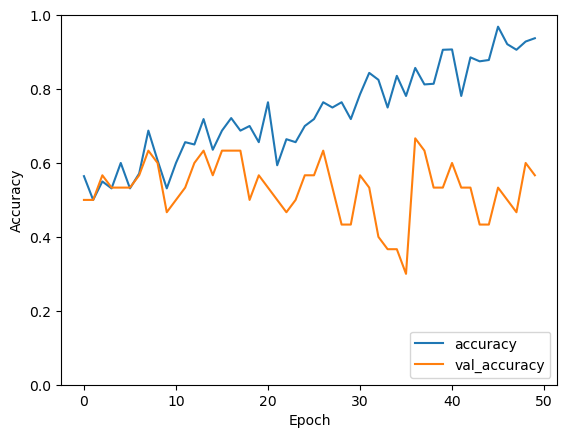

1/1 - 0s - 461ms/step - accuracy: 0.5667 - loss: 1.2704



Test accuracy: 0.5666666626930237


In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)

model.save('ring_classifier_model.h5')